In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import interp

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import unique_labels

In [0]:
df = pd.read_csv('X_final.csv', index_col=[0])

In [0]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'year', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'Economic Sentiment Indicator', 'Active Population Rate',
       'Unemployment Rate', 'AP financing of Residents',
       'Technological balance of payments - debits'],
      dtype='object')

In [0]:
df.head()

,age,job,marital,education,default,balance,housing,loan,year,day,month,campaign,pdays,previous,poutcome,Economic Sentiment Indicator,Active Population Rate,Unemployment Rate,AP financing of Residents,Technological balance of payments - debits
0,58,management,married,tertiary,0,2143,1,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
1,44,technician,single,secondary,0,29,1,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
2,33,entrepreneur,married,secondary,0,2,1,1,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
3,47,blue-collar,married,primary,0,1506,1,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
4,33,unemployed,single,primary,0,1,0,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58


In [0]:
df = pd.get_dummies(df, drop_first=True)

In [0]:
y = pd.read_csv('y.csv', index_col=[0])

In [0]:
X = np.array(df)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
y = y.ravel()

In [0]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
y_pred = clf.predict(X_test)

In [0]:
clf.score(X_test, y_test)

0.8921525258780855

In [0]:
confusion_matrix(y_test, y_pred)

array([[9787,  163],
       [1056,  297]])

In [0]:
confusion_matrix(y_test, y_pred)

array([[9756,  194],
       [1066,  287]])

In [0]:
logit_clf = LogisticRegression(random_state=0)

In [0]:
def plot(clf):

    cv = StratifiedKFold(n_splits=6)
    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        
        # conpute auc
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='darkorange',
             label='Baseline', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='dodgerblue',
             label=r'Mean Model ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return mean_fpr, mean_tpr

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[9787  163]
 [1056  297]]
Normalized confusion matrix
[[0.98 0.02]
 [0.78 0.22]]


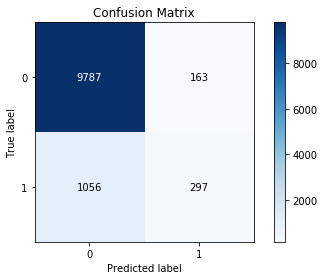

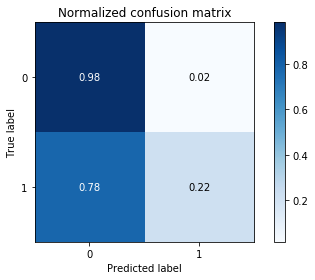

In [0]:
classifier = LogisticRegression(random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = ['0','1'], title='Confusion Matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True,title='Normalized confusion matrix')

plt.show()

### RF

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
# change params here
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=20,max_features=3,\
                                min_samples_leaf=5,min_samples_split=8, oob_score= True)

In [0]:
# fit and predict

In [0]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = rf_clf.predict(X_test)

In [0]:
rf_clf.score(X_test,y_test)

0.8950721047509511

Confusion matrix, without normalization
[[9837  113]
 [1069  284]]
Normalized confusion matrix
[[0.99 0.01]
 [0.79 0.21]]


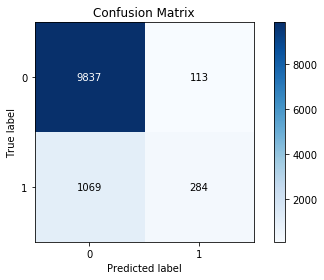

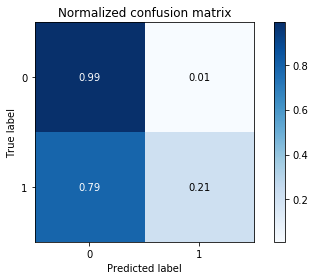

In [0]:
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, y_pred, classes = ['0','1'], title='Confusion Matrix')
plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True,title='Normalized confusion matrix')

plt.show()

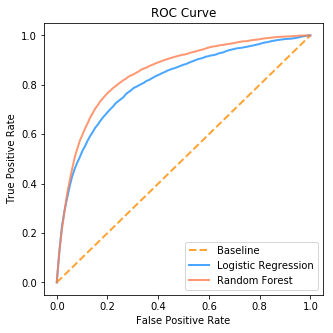

In [0]:
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='darkorange',
             label='Baseline', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(fpr1, tpr1, color='dodgerblue',
         label='Logistic Regression',
         lw=2, alpha=.8)

plt.plot(fpr2, tpr2, color='coral',
         label='Random Forest',
         lw=2, alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
    